In [68]:
import pandas as pd

In [69]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv')

In [70]:
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [71]:
df.columns = ['filmeid', 'titulo', 'genero']

In [72]:
df.head()

,filmeid,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [73]:
generos = df.genero.str.get_dummies()
df = pd.concat([df, generos], axis=1)

In [74]:
df.head()

,filmeid,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [77]:
from sklearn.cluster import KMeans

In [78]:
model = KMeans(n_clusters=3)
model.fit(generos)
print('Grupos {}'.format(model.labels_))

Grupos [2 0 2 ... 1 0 2]


In [79]:
print(model.cluster_centers_)

[[ 1.27293149e-02  3.55672033e-01  2.28004493e-01  1.04080869e-01
   8.64844627e-02  4.86709098e-03  1.17558967e-01  1.42643205e-01
   7.48783227e-03  1.26169974e-01  1.42268813e-02  2.44103332e-01
   3.78135530e-02  3.10745039e-02  8.72332460e-02  4.53013852e-02
   2.34369150e-01  3.55297641e-01  2.02171471e-02  2.69561962e-02]
 [ 9.36750677e-17  1.17850554e-01  6.80350554e-02  1.79889299e-02
   2.21402214e-02  2.32472325e-01  1.46678967e-01  5.07380074e-03
   1.00000000e+00  4.61254613e-02  1.13007380e-02  3.66697417e-02
   7.14944649e-03  2.65221402e-02  6.54981550e-02  2.14714022e-01
   4.35885609e-02  1.87500000e-01  6.87269373e-02  1.36070111e-02]
 [ 2.55871713e-17  1.34186472e-01  1.31261426e-01  9.32358318e-02
   1.23217550e-01  1.00000000e+00  9.10420475e-02  1.35283364e-02
   1.82815356e-03  8.84826325e-02 -7.63278329e-17  6.10603291e-02
   9.50639854e-03  4.97257770e-02  2.04753199e-02  1.98903108e-01
   6.03290676e-02  4.82632541e-02  1.09689214e-02  1.31627057e-02]]


In [80]:
clusters = pd.DataFrame(model.cluster_centers_, columns=generos.columns)

In [81]:
clusters = clusters.transpose()
clusters

,0,1,2
(no genres listed),0.012729,9.367507e-17,2.558717e-17
Action,0.355672,1.178506e-01,1.341865e-01
Adventure,0.228004,6.803506e-02,1.312614e-01
Animation,0.104081,1.798893e-02,9.323583e-02
Children,0.086484,2.214022e-02,1.232176e-01
Comedy,0.004867,2.324723e-01,1.000000e+00
Crime,0.117559,1.466790e-01,9.104205e-02
Documentary,0.142643,5.073801e-03,1.352834e-02
Drama,0.007488,1.000000e+00,1.828154e-03
Fantasy,0.126170,4.612546e-02,8.848263e-02


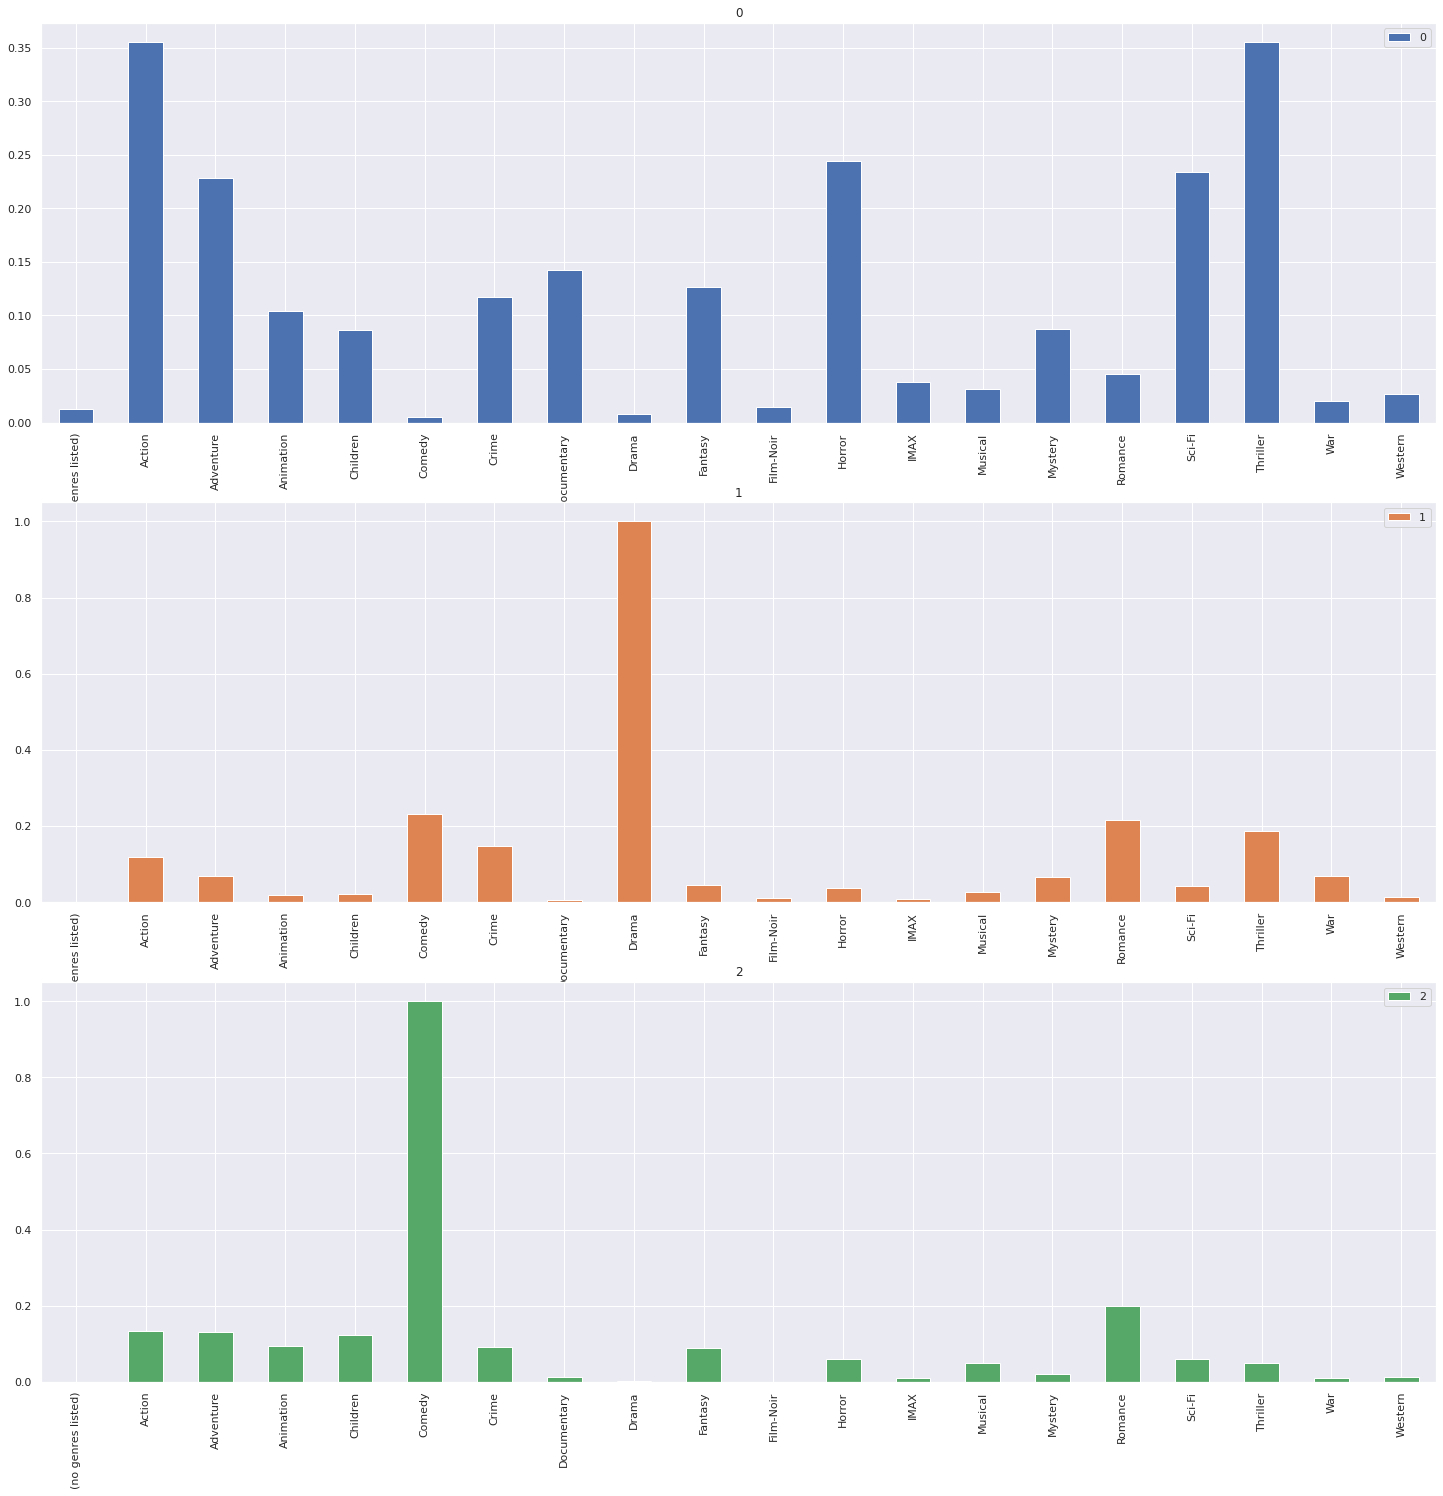

In [82]:
clusters.plot.bar(subplots=True, figsize=(25, 25), sharex=False);

In [83]:
cluster = 0
filtro = model.labels_ == cluster
df[filtro].sample(10)

,filmeid,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
668,880,"Island of Dr. Moreau, The (1996)",Sci-Fi|Thriller,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
7524,84414,All-Star Superman (2011),Action|Adventure|Animation|Sci-Fi,0,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6877,62836,Babylon 5: The Lost Tales - Voices in the Dark...,Sci-Fi,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7598,86628,Kill the Irishman (2011),Action|Crime,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5826,32213,Cube Zero (2004),Horror|Mystery|Sci-Fi|Thriller,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,1,0,0
4487,6631,Man's Best Friend (1993),Horror|Sci-Fi|Thriller,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2784,3725,American Pop (1981),Animation|Musical,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2499,3338,For All Mankind (1989),Documentary,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4334,6333,X2: X-Men United (2003),Action|Adventure|Sci-Fi|Thriller,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3119,4195,"Abominable Dr. Phibes, The (1971)",Horror|Mystery,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [84]:
from sklearn.manifold import TSNE

In [85]:
tsne = TSNE()
viz = tsne.fit_transform(generos_escalados)
viz

array([[-68.307625 ,  -1.7353256],
       [ 21.19228  ,   9.730743 ],
       [-31.991394 , -18.696302 ],
       ...,
       [-12.108884 ,   9.415857 ],
       [-35.864258 ,  20.810602 ],
       [  9.055476 , -21.350632 ]], dtype=float32)

In [86]:
import seaborn as sns

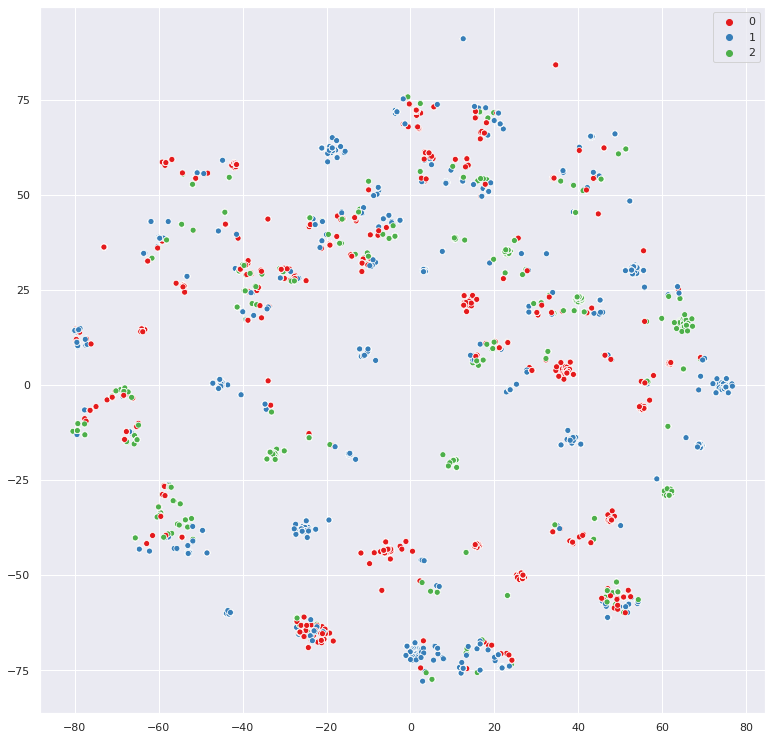

In [87]:
sns.set(rc={'figure.figsize':(13, 13)})
sns.scatterplot(x=viz[:, 0], y=viz[:, 1], hue=model.labels_, palette=sns.color_palette('Set1', 3));

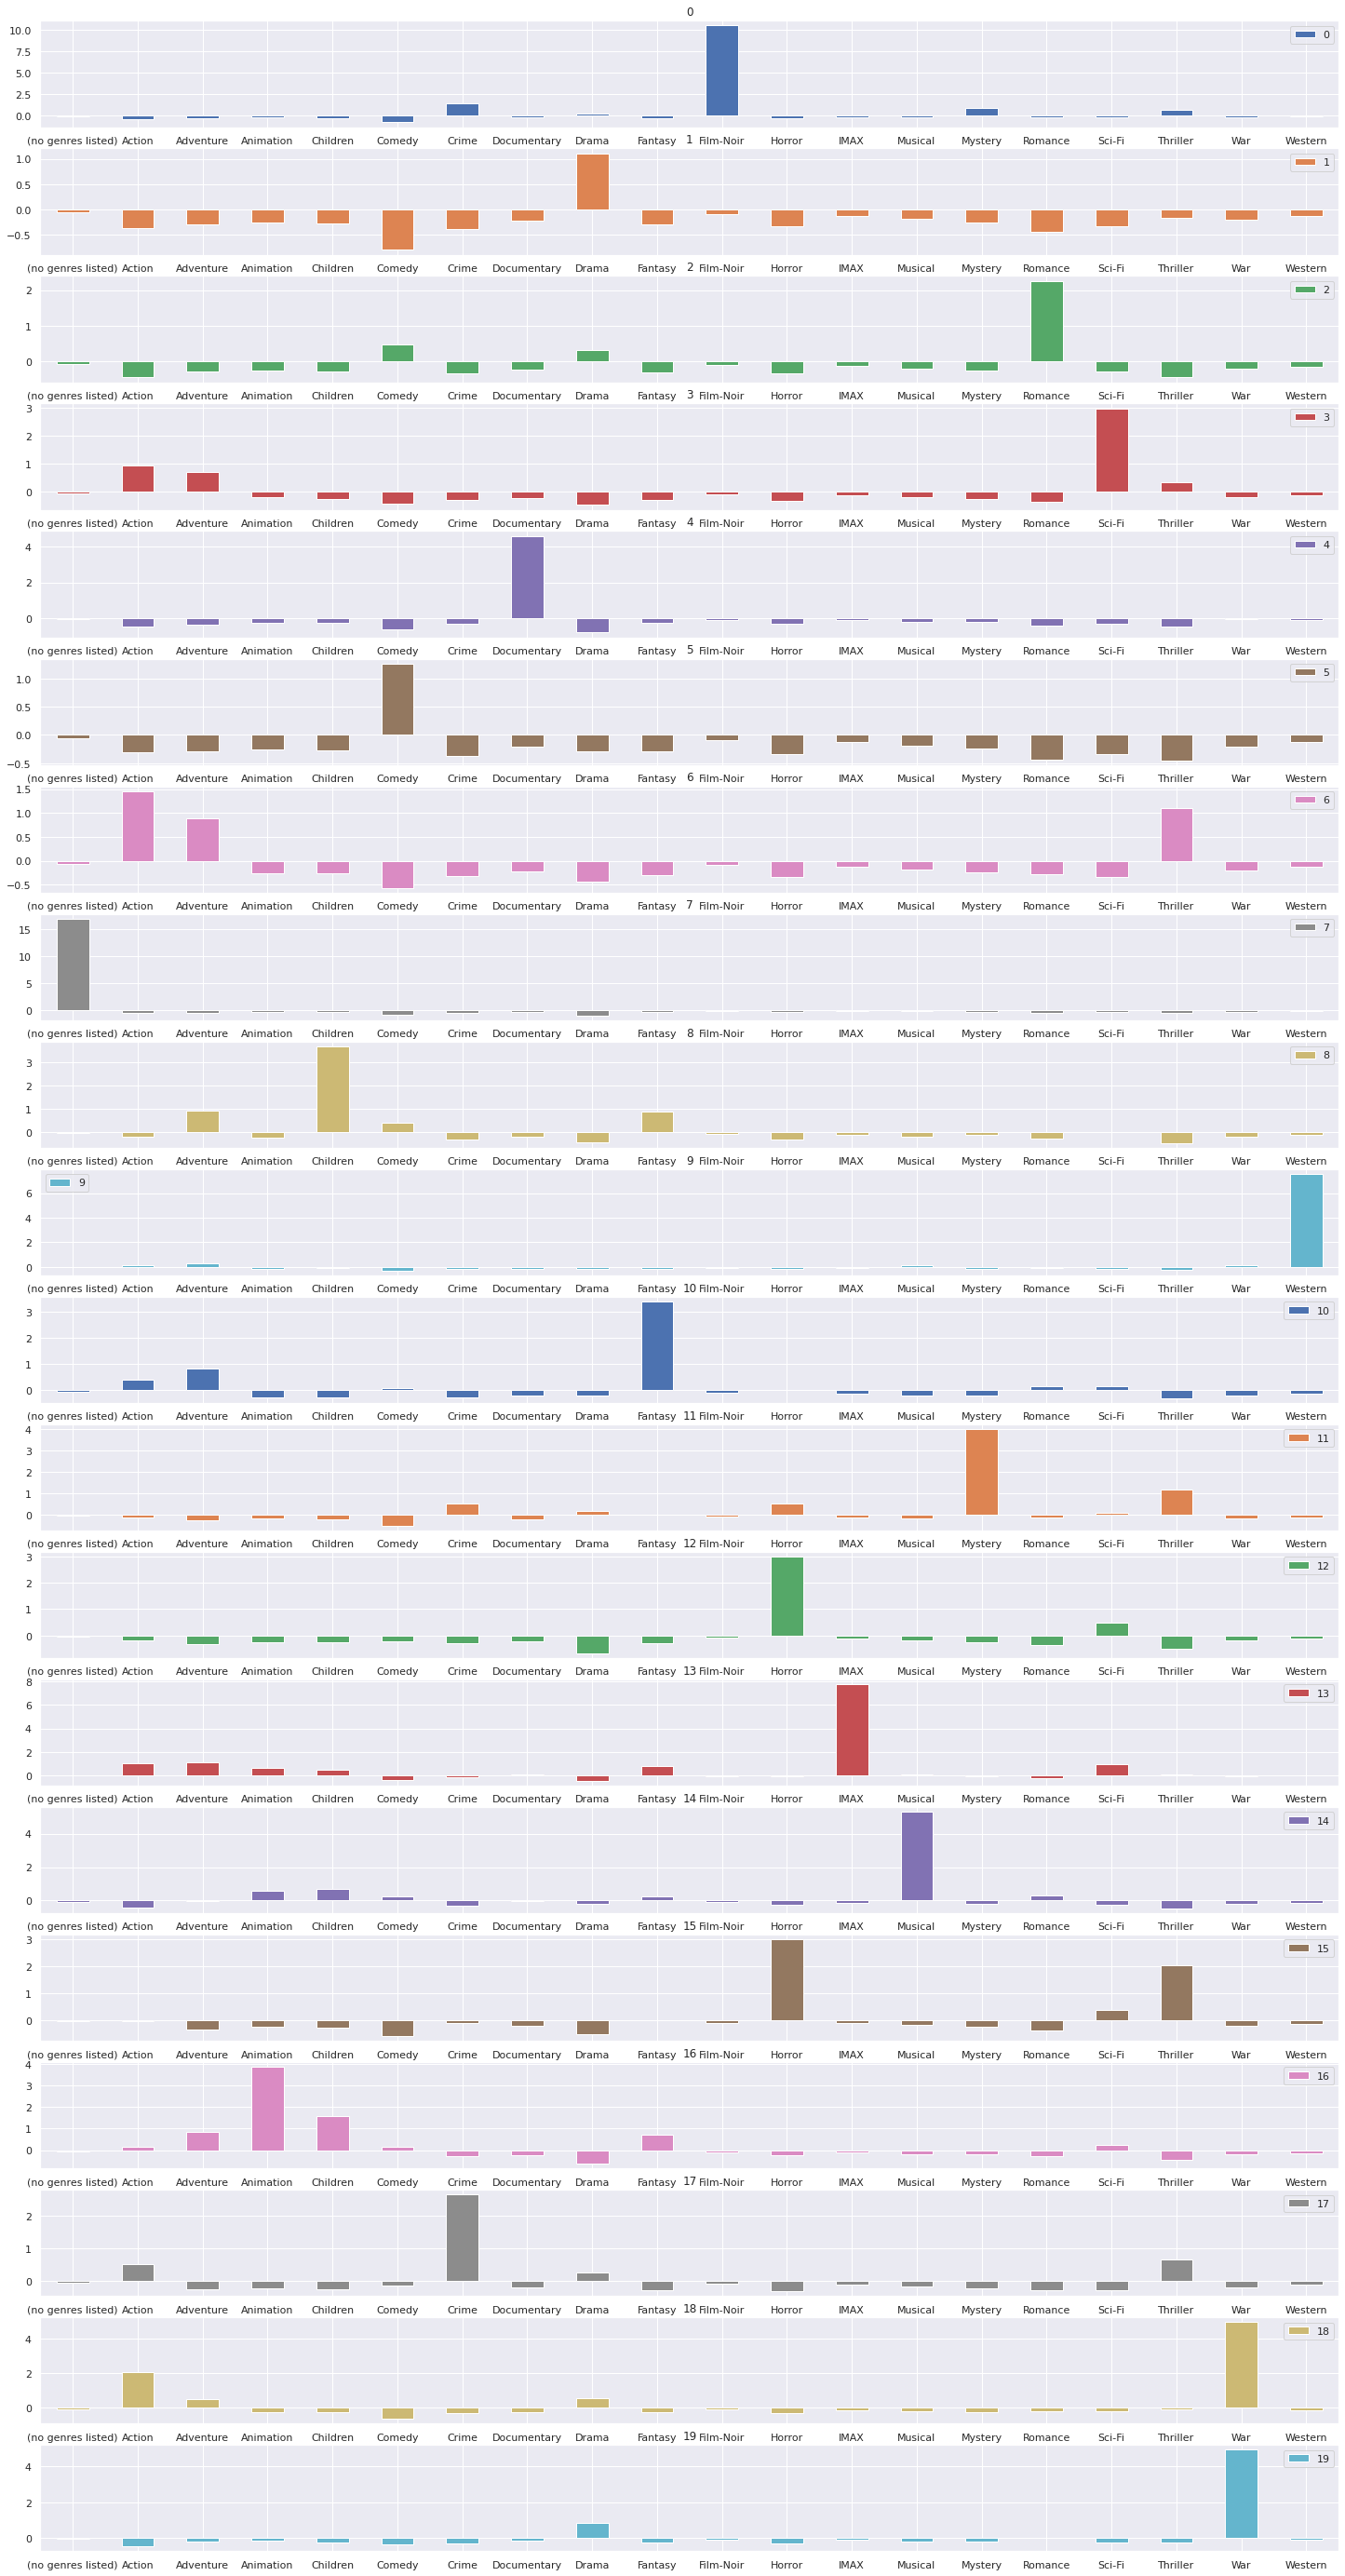

In [88]:
model = KMeans(n_clusters=20)
model.fit(generos_escalados)
clusters = pd.DataFrame(model.cluster_centers_, columns=generos.columns)

clusters.transpose().plot.bar(subplots=True, figsize=(25, 50), sharex=False, rot=0);

In [89]:
cluster = 14
filtro = model.labels_ == cluster
df[filtro].sample(10)

,filmeid,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
5033,7835,Song of the Thin Man (1947),Comedy|Crime|Drama|Musical|Mystery|Romance,0,0,0,0,0,1,1,...,0,0,0,1,1,1,0,0,0,0
5816,32019,Be Cool (2005),Comedy|Crime|Musical,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
7919,95377,One Man Band (2005),Animation|Comedy|Musical,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
6368,49824,Dreamgirls (2006),Drama|Musical,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6785,60365,Frosty the Snowman (1969),Animation|Children|Comedy|Fantasy|Musical,0,0,0,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
2955,3963,"Unsinkable Molly Brown, The (1964)",Musical,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7754,91266,Another Cinderella Story (2008),Children|Comedy|Musical|Romance,0,0,0,0,1,1,0,...,0,0,0,1,0,1,0,0,0,0
4520,6696,Bollywood/Hollywood (2002),Comedy|Drama|Musical|Romance,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
5662,27595,Jesus Christ Vampire Hunter (2001),Action|Comedy|Horror|Musical,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
2287,3034,Robin Hood (1973),Adventure|Animation|Children|Comedy|Musical,0,0,1,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0


In [90]:
def kmeans(numero_de_clusters, generos):
    model = KMeans(n_clusters=numero_de_clusters)
    model.fit(generos)
    return [numero_de_clusters, model.inertia_]

In [91]:
kmeans(20, generos_escalados)

[20, 54657.359727092124]

In [92]:
lista = [kmeans(n, generos_escalados)for n in range(1, 40)]

In [93]:
resultado = pd.DataFrame(lista, columns=['Cluster', 'EMS'])

In [94]:
resultado

,Cluster,EMS
0,1,194840.000000
1,2,179451.577814
2,3,166516.810046
3,4,156044.524727
4,5,147585.228573
5,6,138246.663944
6,7,127667.231191
7,8,120207.989413
8,9,109955.704391
9,10,102321.403318


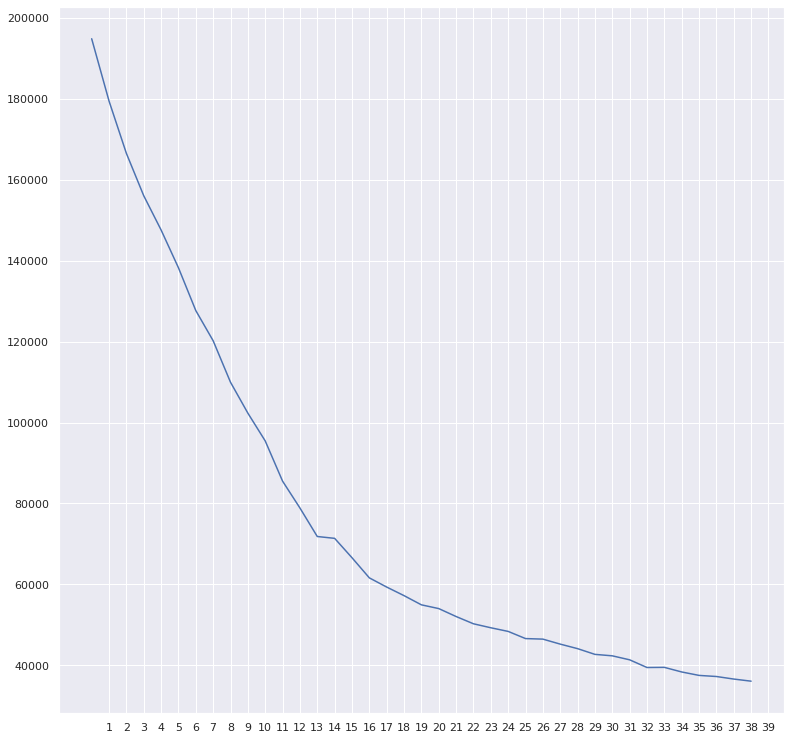

In [95]:
resultado.EMS.plot(xticks=resultado.Cluster);

In [96]:
from sklearn.cluster import AgglomerativeClustering

In [97]:
model = AgglomerativeClustering(n_clusters=17)
grupos = model.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

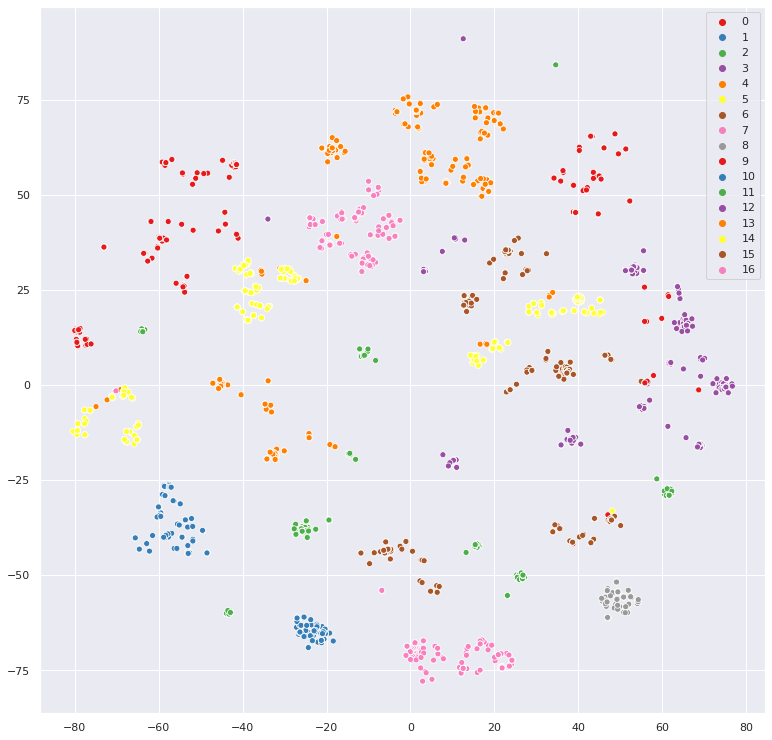

In [98]:
sns.scatterplot(x=viz[:, 0], y=viz[:, 1], hue=grupos, palette=sns.color_palette('Set1', 17));

In [99]:
from scipy.cluster.hierarchy import dendrogram, linkage

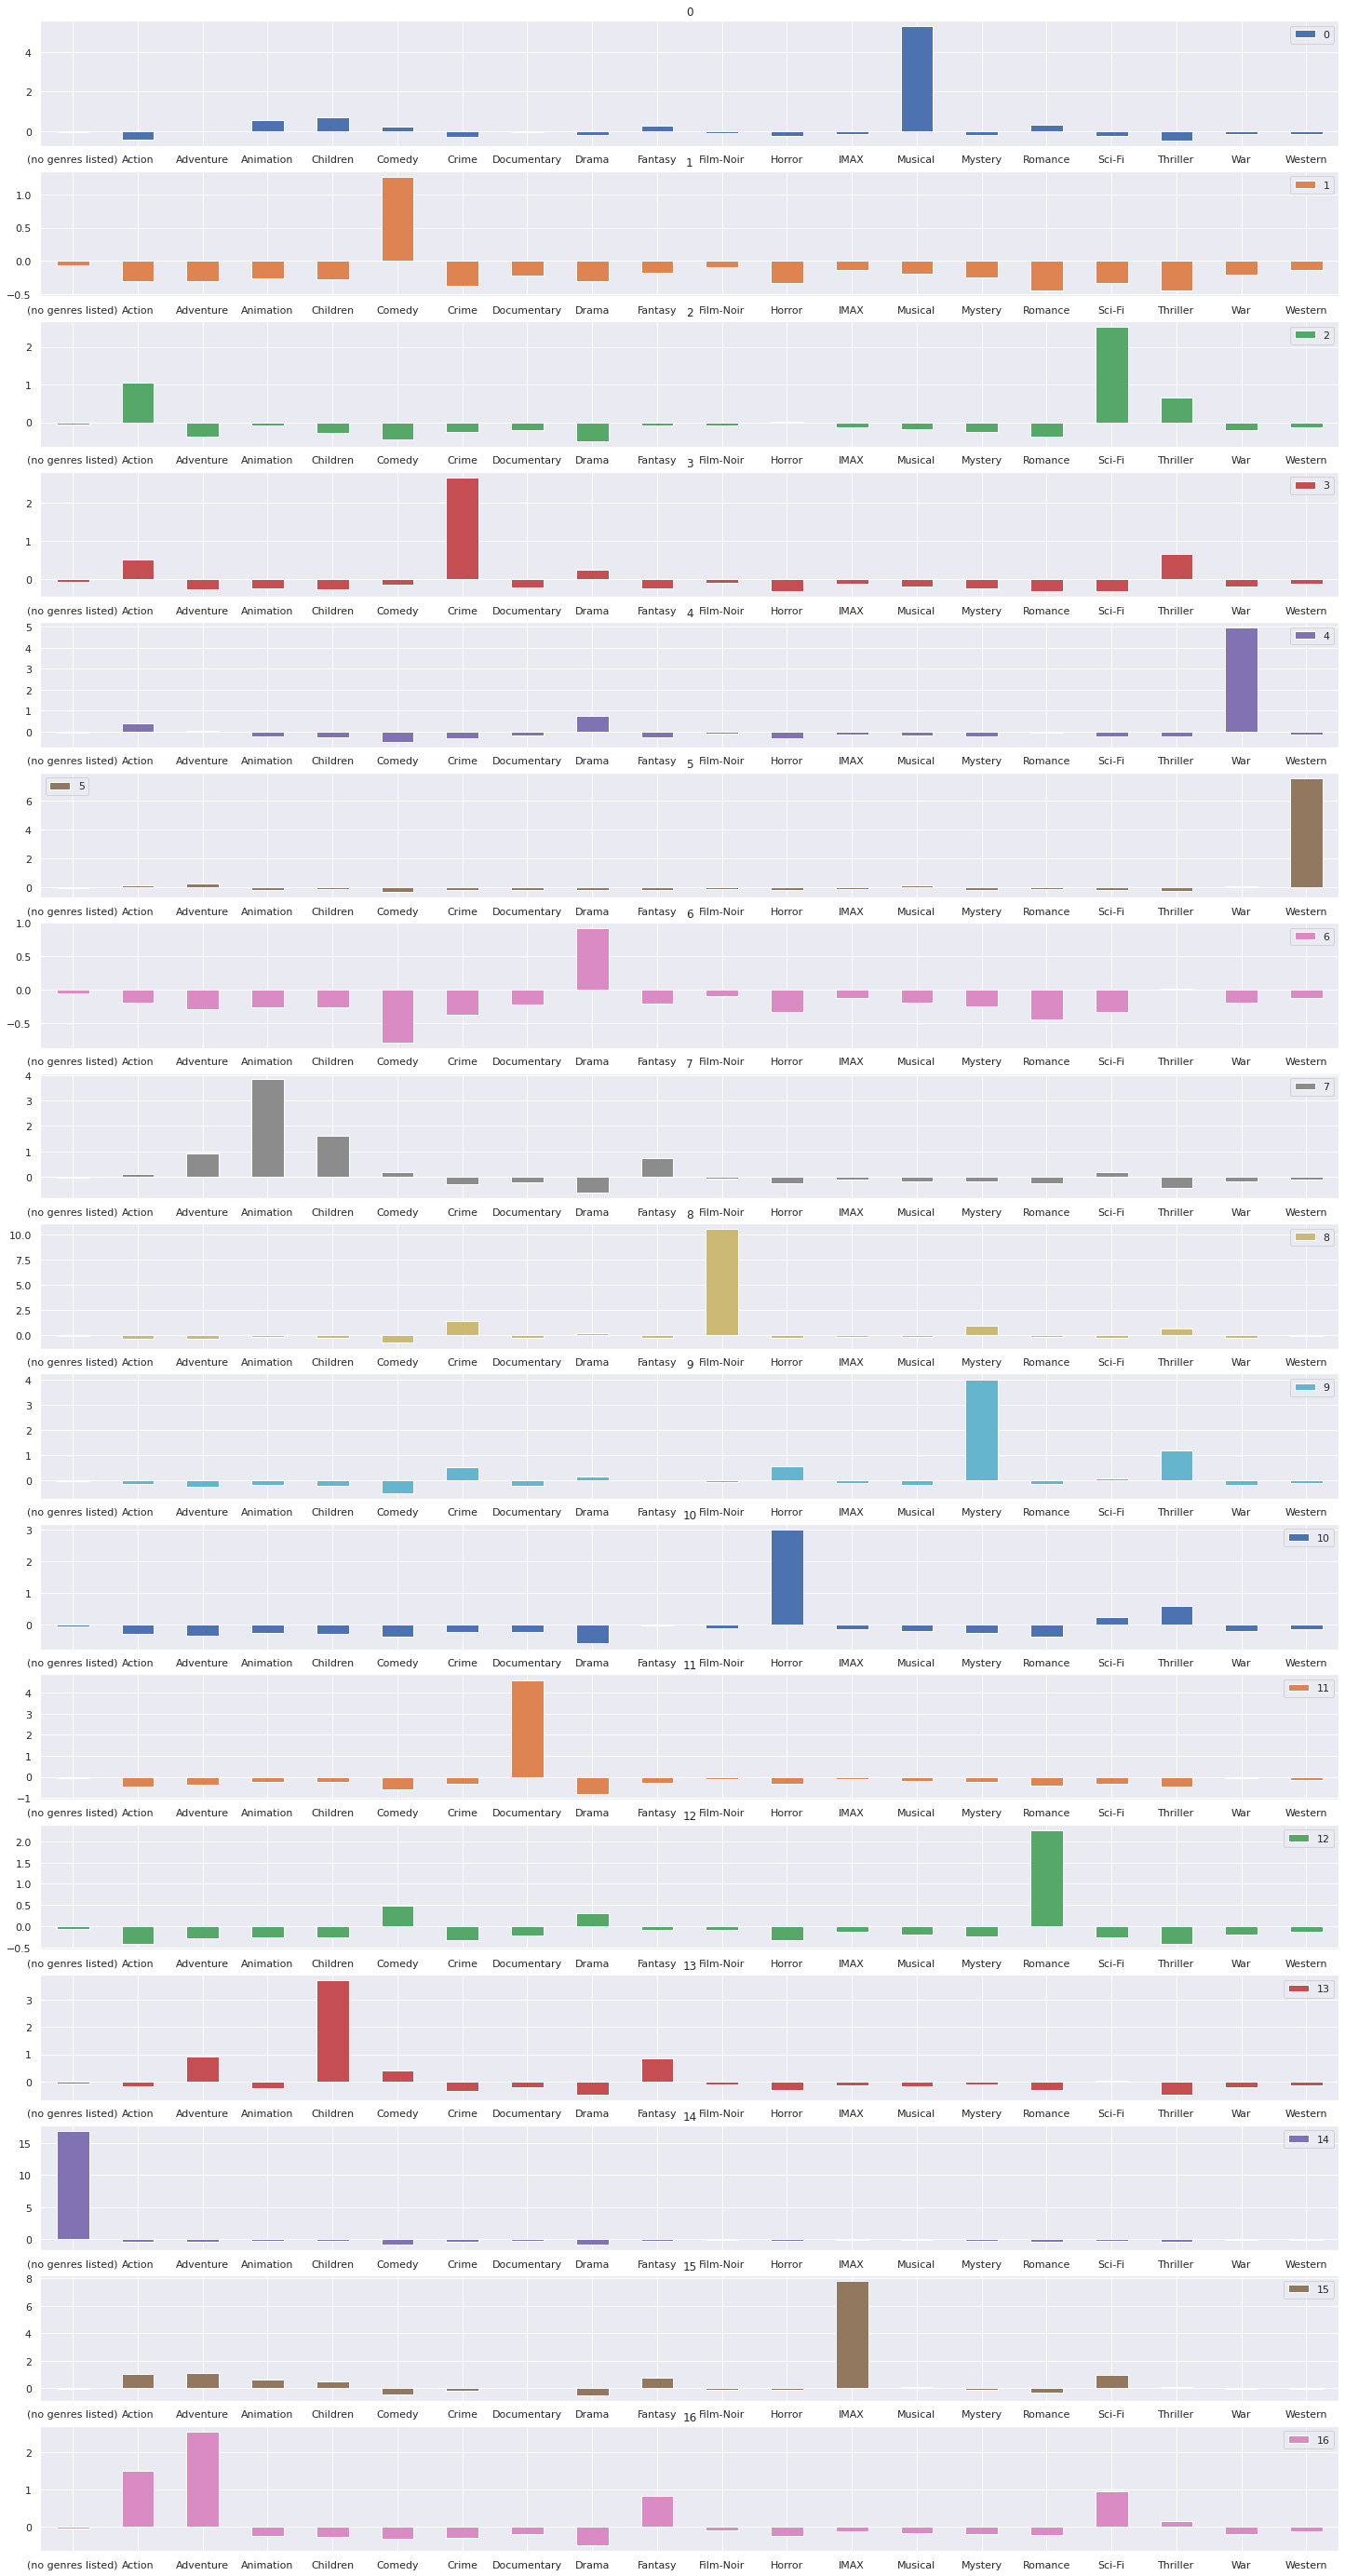

In [100]:
model = KMeans(n_clusters=17)
model.fit(generos_escalados)
clusters = pd.DataFrame(model.cluster_centers_, columns=generos.columns)

clusters.transpose().plot.bar(subplots=True, figsize=(25, 50), sharex=False, rot=0);

In [101]:
matriz_distancia = linkage(clusters)
matriz_distancia

array([[ 1.        ,  6.        ,  2.43199918,  2.        ],
       [12.        , 17.        ,  2.88458597,  3.        ],
       [ 3.        , 18.        ,  3.32999871,  4.        ],
       [ 2.        , 19.        ,  3.53198464,  5.        ],
       [16.        , 20.        ,  3.54371222,  6.        ],
       [10.        , 21.        ,  3.77888146,  7.        ],
       [13.        , 22.        ,  4.38527754,  8.        ],
       [ 7.        , 23.        ,  4.64425057,  9.        ],
       [ 9.        , 24.        ,  4.67433541, 10.        ],
       [11.        , 25.        ,  5.15243365, 11.        ],
       [ 4.        , 26.        ,  5.23131642, 12.        ],
       [ 0.        , 27.        ,  5.81741832, 13.        ],
       [ 5.        , 28.        ,  7.85584977, 14.        ],
       [15.        , 29.        ,  8.15804301, 15.        ],
       [ 8.        , 30.        , 10.8146377 , 16.        ],
       [14.        , 31.        , 17.0644745 , 17.        ]])

{'icoord': [[155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [135.0, 135.0, 152.5, 152.5],
  [125.0, 125.0, 143.75, 143.75],
  [115.0, 115.0, 134.375, 134.375],
  [105.0, 105.0, 124.6875, 124.6875],
  [95.0, 95.0, 114.84375, 114.84375],
  [85.0, 85.0, 104.921875, 104.921875],
  [75.0, 75.0, 94.9609375, 94.9609375],
  [65.0, 65.0, 84.98046875, 84.98046875],
  [55.0, 55.0, 74.990234375, 74.990234375],
  [45.0, 45.0, 64.9951171875, 64.9951171875],
  [35.0, 35.0, 54.99755859375, 54.99755859375],
  [25.0, 25.0, 44.998779296875, 44.998779296875],
  [15.0, 15.0, 34.9993896484375, 34.9993896484375],
  [5.0, 5.0, 24.99969482421875, 24.99969482421875]],
 'dcoord': [[0.0, 2.4319991762109496, 2.4319991762109496, 0.0],
  [0.0, 2.884585968582659, 2.884585968582659, 2.4319991762109496],
  [0.0, 3.3299987136110945, 3.3299987136110945, 2.884585968582659],
  [0.0, 3.531984639480595, 3.531984639480595, 3.3299987136110945],
  [0.0, 3.5437122185640857, 3.5437122185640857, 3.531984639480595],

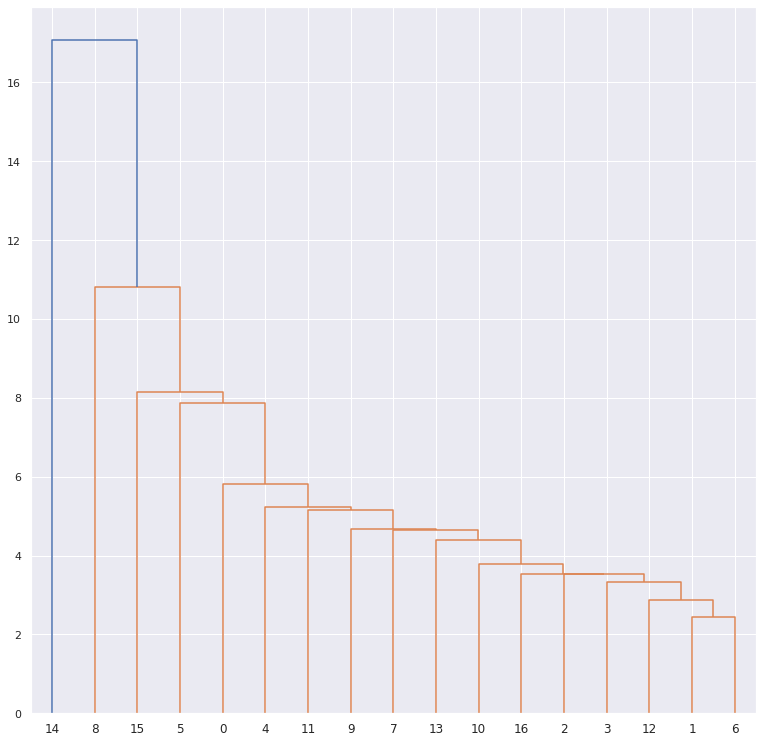

In [102]:
dend = dendrogram(matriz_distancia)
dend